# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [1]:
import pandas as pd

# Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the dataset
print(boston_df.head())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

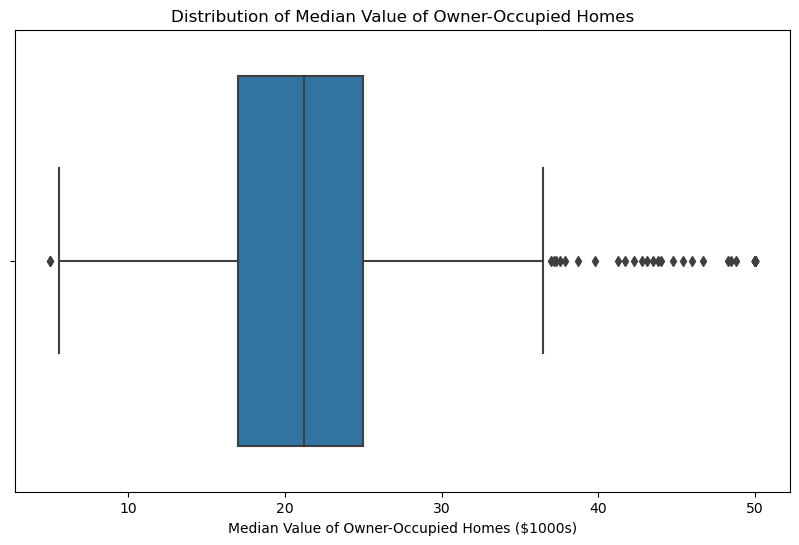

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for MEDV
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

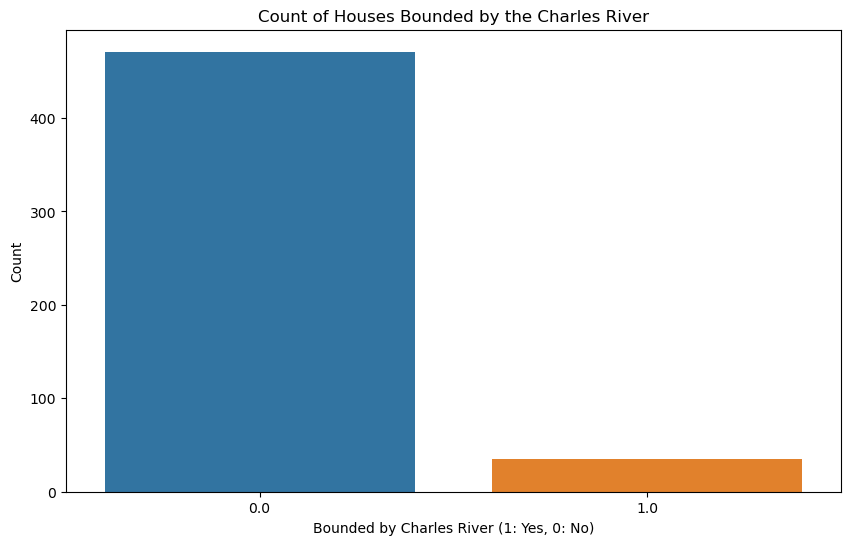

In [3]:
# Bar plot for CHAS
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Count of Houses Bounded by the Charles River')
plt.xlabel('Bounded by Charles River (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


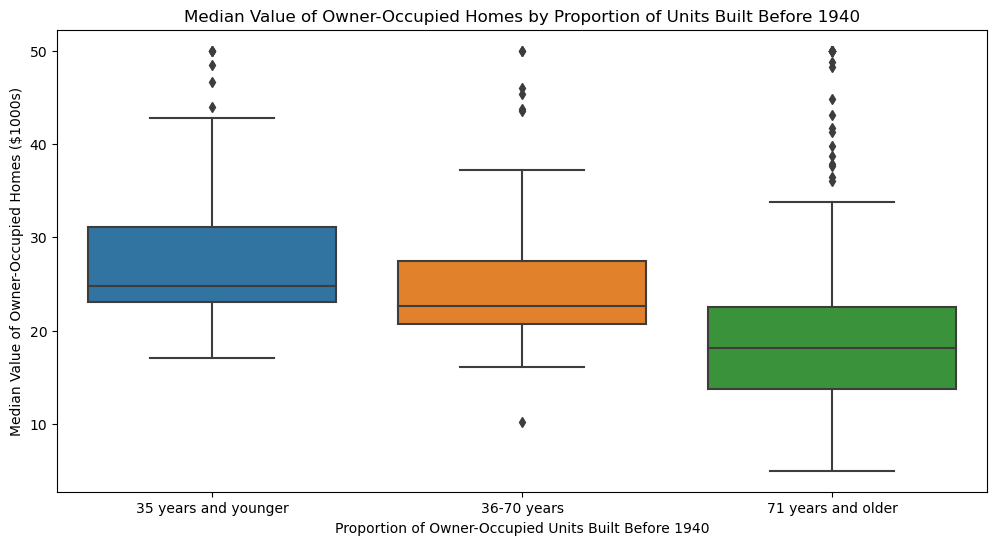

In [4]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', '36-70 years', '71 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes by Proportion of Units Built Before 1940')
plt.xlabel('Proportion of Owner-Occupied Units Built Before 1940')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


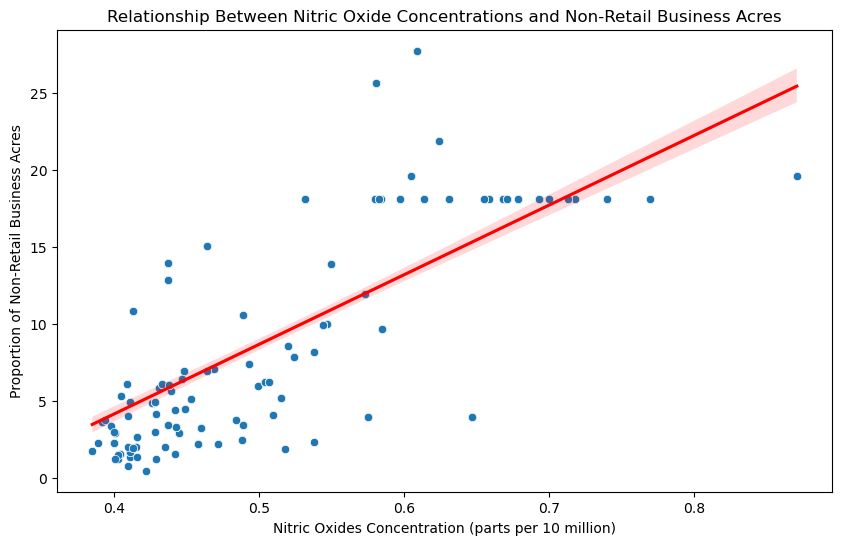

In [5]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
sns.regplot(x='NOX', y='INDUS', data=boston_df, scatter=False, color='red')
plt.title('Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


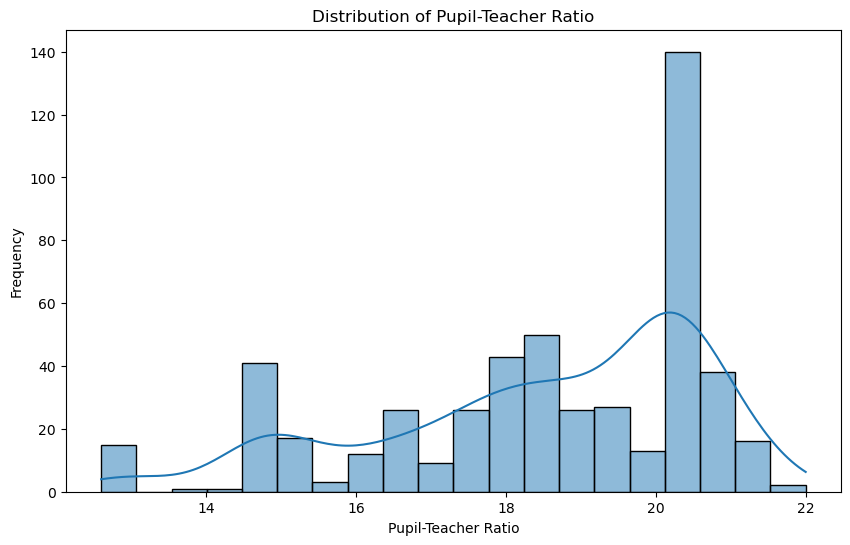

In [6]:
# Histogram for PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


# Task 3: Use the appropriate tests to answer the questions provided.

## 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis

Null Hypothesis (H0) : There is no significant difference in the median value of houses bounded by the Charles River compared to those not bounded by it.

Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by it.

In [7]:
from scipy.stats import ttest_ind

# Separate data based on CHAS
data_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
data_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(data_chas_1, data_chas_0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


### Decision Rule

Since the p-value < 0.05, reject the null hypothesis(H0).

### Interpretation

Rejecting the Null Hypothesis: This indicates that there is a statistically significant difference in the median value of houses based on whether they are bounded by the Charles River or not.

Practical Meaning: Houses bounded by the Charles River have a different median value compared to those not bounded by the river. This suggests that proximity to the Charles River has a significant impact on house prices in Boston.

## 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Hypothesis

Null Hypothesis (H0): There is no significant difference in median home values (MEDV) across different age groups.

Alternative Hypothesis (H1): There is a significant difference in median home values (MEDV) across different age groups.

In [8]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_results = f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '36-70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '71 years and older']['MEDV']
)
print(f"F-statistic: {anova_results.statistic}, P-value: {anova_results.pvalue}")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


### Decision Rule 
Since the p-value < 0.05, reject the null hypothesis(H0).

### Interpretation

Rejecting the Null Hypothesis: This indicates that there is a statistically significant difference in median home values (MEDV) across the different age groups.

Practical Meaning: The extremely low p-value suggests a very strong evidence that at least one age group differs significantly in median home values from the others. This indicates that the proportion of owner-occupied units built prior to 1940 (AGE) has a meaningful impact on median home values in Boston.

## 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Hypothesis

Null Hypothesis (H0): There is no linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

Alternative Hypothesis (H1): There is a linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

In [11]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")


Pearson correlation coefficient: 0.7636514469209151, P-value: 7.913361061239527e-98


### Decision Rule 
Since the p-value is much less than 0.05, reject the null hypothesis(H0).

### Conclusion
Given the very small p-value, there is strong evidence to suggest a significant positive linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. The correlation coefficient of 0.7637 further supports this finding, indicating a substantial and statistically significant correlation.



## 4.What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [10]:
import statsmodels.api as sm

# Define predictor and response variables
X = boston_df[['DIS']]
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add a constant term for the intercept

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        23:46:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Conclusion

Impact: There is a statistically significant positive impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes. Specifically, an increase in distance is associated with an increase in median home values, though the R-squared value suggests that the model only explains a small portion of the variance in home values.

Practical Implication: Despite the significant coefficient, the low R-squared value implies that other variables may be contributing to the variability in median home values that are not accounted for in this model.

### Recommendations for Further Analysis
Include More Variables: Consider adding other relevant predictors (e.g., crime rate, average number of rooms, etc.) to the model to improve its explanatory power.

Check Model Assumptions: Evaluate residuals and other diagnostic metrics to ensure the assumptions of the linear regression model are met.



